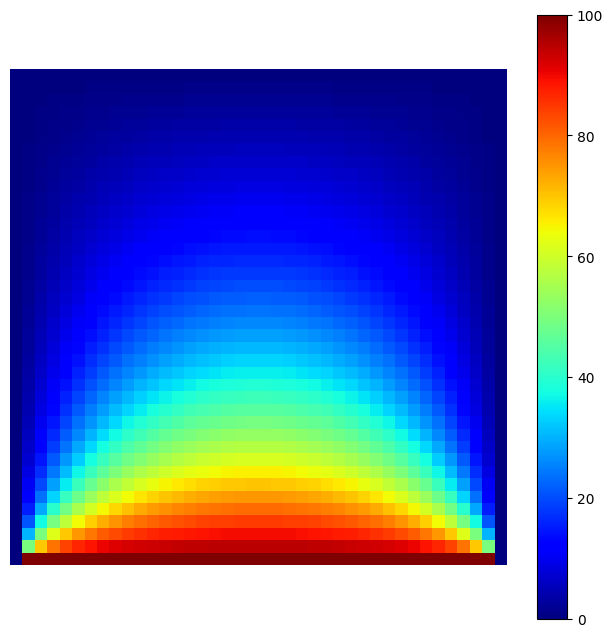

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg
from scipy import sparse

alpha = 0.1 # thermal conductivity
T_0 = 0. # temperature cold
T_1 = 100. # temperature hot
h = 1.0 # domain height
w = 1.0 # domain width

nx = 40 # number of grid points
ny = 40 
nn =nx*ny 

x = np.linspace(0,w,nx) # grid points
y = np.linspace(0,h,ny)
dx = x[1]-x[0] # point spacing
dy = y[1]-y[0] # 

ind = np.arange(0,nn)   # ind = [0,1,2,3,4 ..,nn]

a0 = np.zeros(nn) + (-2.0/dx**2-2.0/dy**2)*alpha
a1 = np.zeros(nn) + (1.0/dx**2)*alpha
a2 = np.zeros(nn) + (1.0/dy**2)*alpha

# sparse matrix with main and secondary diagonals
A = sparse.dia_matrix(([a0, a1, a1, a2, a2], [0, 1, -1,ny,-ny]), shape=(nn, nn))
A = sparse.csr_matrix(A) # compressed-row-storage format

# Dirichlet boundary conditions
b = np.zeros([nx,ny]) # 
b[0,:] = T_0 # top
b[-1,:] = T_1 # bottom
b[:,0] = T_0 # left
b[:,-1] = T_0 # right
b = np.reshape(b,nn) 

free = np.zeros([nx,ny],bool)
free[1:-1,1:-1] = True
fixed = np.logical_not(free)
indFix = np.reshape(fixed,nn)

nnz_per_row = np.diff(A.indptr)
A.data[np.repeat(fixed, nnz_per_row)] = 0
A.eliminate_zeros() # remove the zeroed entries
A = sparse.lil_matrix(A)
dia = A.diagonal()
dia[indFix] = 1.0
A.setdiag(dia)
A = sparse.csr_matrix(A)

T = sparse.linalg.spsolve(A, b)
T = np.reshape(T,(nx,ny))

fig=plt.figure(figsize=(8,8), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

plt.imshow(T,cmap="jet",interpolation="nearest")
plt.colorbar()
plt.gca().set_aspect('equal')
plt.axis('off')
# plt.savefig("heat.eps")
plt.savefig("heat.png",dpi=200)
plt.show()
plt.close()


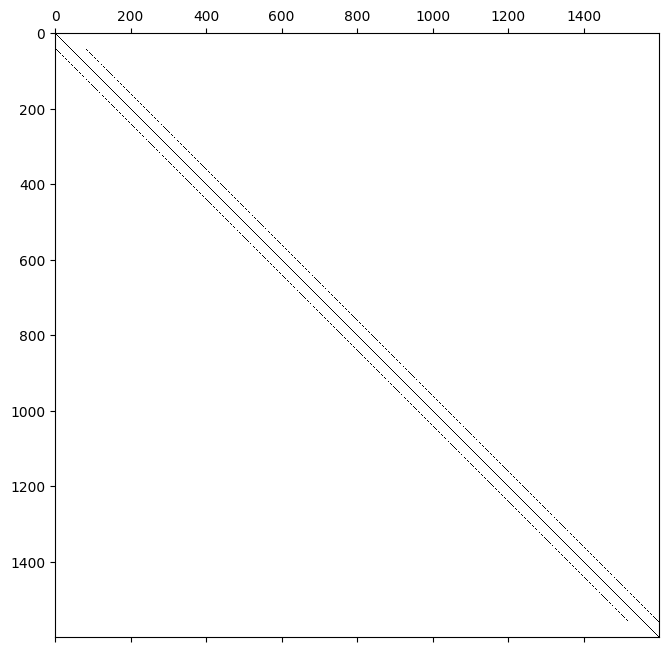

In [14]:
fig=plt.figure(figsize=(8,8), dpi=100, facecolor='w', edgecolor='k')
plt.spy(A.todense())
plt.show()